In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

N = 10
t_dist = sorted(np.random.standard_t(1, size=10))
t_dist

[-3.078322498951745,
 -0.44257926668743197,
 -0.28442575572329976,
 -0.08391894271348821,
 0.5619567861663247,
 1.0176669779384615,
 1.3448162439504447,
 1.874164646241363,
 2.936477005326059,
 5.340289177069092]

In [11]:
t_dist_quantiles = []
quantiles_percent = []
for i, val in enumerate(t_dist[:-1]):
    t_dist_quantiles.append((val + t_dist[i+1])/2)
    quantiles_percent.append((i+1)/len(t_dist))

In [12]:
qp_array = np.array(quantiles_percent).reshape(-1,1)
tq_array = np.array(t_dist_quantiles).reshape(-1,1)
qq_df = pd.DataFrame(np.concatenate((qp_array, tq_array), axis=1),
                     columns=['percent_below', 'quantile'])
print(qq_df)

   percent_below  quantile
0            0.1 -1.760451
1            0.2 -0.363503
2            0.3 -0.184172
3            0.4  0.239019
4            0.5  0.789812
5            0.6  1.181242
6            0.7  1.609490
7            0.8  2.405321
8            0.9  4.138383


In [13]:
qq_df['theoretical_quantile'] = [norm.ppf(percentage) for percentage in qq_df['percent_below']]

In [15]:
print(qq_df)

   percent_below  quantile  theoretical_quantile
0            0.1 -1.760451             -1.281552
1            0.2 -0.363503             -0.841621
2            0.3 -0.184172             -0.524401
3            0.4  0.239019             -0.253347
4            0.5  0.789812              0.000000
5            0.6  1.181242              0.253347
6            0.7  1.609490              0.524401
7            0.8  2.405321              0.841621
8            0.9  4.138383              1.281552


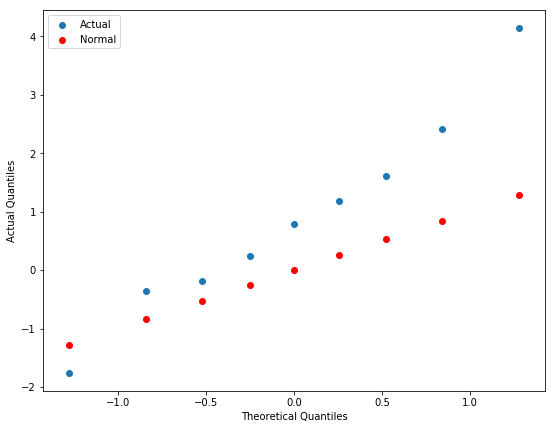

In [18]:
plt.subplots(figsize=(9,7))
plt.scatter(x=qq_df['theoretical_quantile'],
            y=qq_df['quantile'], label='Actual');
plt.scatter(x=qq_df['theoretical_quantile'],
            y=qq_df['theoretical_quantile'], 
            c='red', label='Normal')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Actual Quantiles')
plt.legend()
plt.savefig('qq_plot', bpi=150);
plt.show()